In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('Postures.csv')

# Data Visulaization and Standardization

In [3]:
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.54311453354464,87.7333643096221,61.2163626180662,-62.1262783028233,?,?,?,?,?,?
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.1305625712145,78.2298473919132,33.0784071753174,-45.2495433686171,?,?,?,?,?,?
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.83590370588782,78.591554010542,32.32773753847,-46.1665560916632,?,?,?,?,?,?
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.2216259324485,?,?,?,?,?,?,?,?,?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [5]:
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
count,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000
mean,2.983738,7.959127,50.345664,85.812051,-29.984712,49.595209,86.192647,-29.509202,48.612121,83.771315,-30.560515
std,1.421183,4.697810,32.696173,40.204363,34.361918,32.478238,40.453214,34.764398,33.605390,41.023543,35.120329
min,0.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296
25%,2.000000,5.000000,29.295062,63.494432,-56.356438,28.755137,64.154529,-57.360107,25.170006,58.052385,-58.654059
50%,3.000000,9.000000,54.619964,86.526246,-30.864125,54.215514,87.542751,-30.184005,53.814580,86.458324,-32.352414
75%,4.000000,12.000000,72.488686,113.107355,-1.418803,71.762039,116.219398,-0.366692,71.561951,106.660827,-0.944786
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879


In [6]:
columns=list(df)

In [7]:
#assigning 'Users' column Sequential correct values instead of 0
for i in range(1,df['User'].count()+1):
    df['User'][i]=i

<ipython-input-7-9c339d3e36f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User'][i]=i


In [8]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,2,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,3,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,4,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [9]:
#dropping first row as it is a dummy row
df.drop(df.index[:1],inplace=True)

In [10]:
#replacing '?' with NaN values 
for i in columns:
    df[i].replace('?',np.NaN,inplace=True)

In [11]:
#counting null values for every feature
df.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

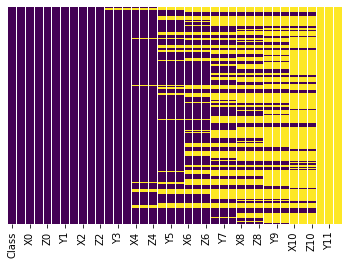

In [12]:
#null values in columns graphically
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
#removing all columns from X6 to Y11 as the null values are extremenly high
df.drop(['X6','Y6','Z6','X7','Y7','Z7','X8','Y8','Z8','X9','Y9','Z9','X10','Y10','Z10','X11','Y11','Z11'],axis=1,inplace=True)

In [13]:
columns=df.columns

In [14]:
# imputing missing data with feature mode.
for i in columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [15]:
#Changing feature's object type to float type
for i in columns:
    df[i]=df[i].astype(float)

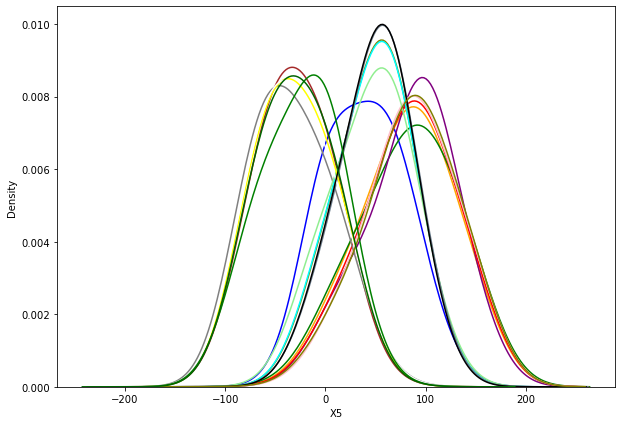

In [16]:
#STANDARDIZATION
# Original data distribution
col=list(set(columns)-set(['Class', 'User']))
clr=['blue','orange','green','purple','red','brown','pink','grey','olive','cyan','lightgreen','slategray','yellow','white','black','green','olive','darkgreen']
plt.figure(figsize=(10,7))
for i in range(0,18):
    sns.kdeplot(df[col[i]],bw_adjust=7,color=clr[i],Label=col[i])

In [16]:
#applying standard scalar
c=columns
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df)
standard_df = pd.DataFrame(standard_df, columns =c)

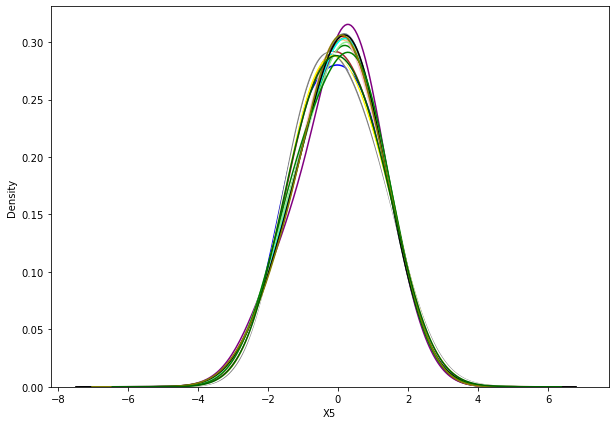

In [18]:
#Data Distribution After Standard Scalar
plt.figure(figsize=(10,7))
for i in range(0,18):
    sns.kdeplot(standard_df[col[i]],bw_adjust=8,color=clr[i],Label=col[i])

# APPLYING MODELS AND CALCULATING THEIR ACCURACY AND CONFUSION MATRIX

In [17]:
dum_X=df[['User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2','X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5']]
dum_y=df['Class']

In [30]:
X=dum_X.iloc[::,:19].values
y = dum_y.iloc[::].values

In [35]:
X.shape

(78095, 19)

In [36]:
acc={}
a=[]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Naive Bayes

In [38]:
# NAIVE BAYES

nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
acc_nb=accuracy_score(y_test,y_pred)
a.append(acc_nb)
acc['NAIVE BAYES']=accuracy_score(y_test, y_pred) * 100

print('\nNAIVE BAYES Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('NAIVE BAYES Classification report:\n\n', classification_report(y_test, y_pred))


NAIVE BAYES Accuracy: 66.36%
NAIVE BAYES Classification report:

               precision    recall  f1-score   support

         1.0       0.82      0.88      0.85      4867
         2.0       0.63      0.78      0.70      4461
         3.0       0.61      0.55      0.58      4887
         4.0       0.48      0.46      0.47      4417
         5.0       0.77      0.64      0.70      4797

    accuracy                           0.66     23429
   macro avg       0.66      0.66      0.66     23429
weighted avg       0.66      0.66      0.66     23429



[[4297  277   22  220   51]
 [  14 3470  302  384  291]
 [ 367  426 2692 1135  267]
 [ 359  713 1022 2028  295]
 [ 221  620  408  488 3060]]


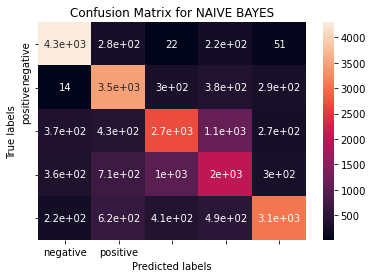

In [39]:
#confusion Matrix Naive bayes
cm= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
print(confusion_matrix(y_test, y_pred))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for NAIVE BAYES'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

# KNN

In [40]:
knn=KNeighborsClassifier(n_neighbors=4,p=2)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred)
a.append(acc_knn)
acc['KNN']=accuracy_score(y_test, y_pred) * 100

print('\nKNN Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('KNN Classification report:\n\n', classification_report(y_test, y_pred))


KNN Accuracy: 99.66%
KNN Classification report:

               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      4867
         2.0       1.00      1.00      1.00      4461
         3.0       0.99      1.00      1.00      4887
         4.0       1.00      0.99      0.99      4417
         5.0       1.00      1.00      1.00      4797

    accuracy                           1.00     23429
   macro avg       1.00      1.00      1.00     23429
weighted avg       1.00      1.00      1.00     23429



[[4867    0    0    0    0]
 [  14 4446    1    0    0]
 [   0    2 4875   10    0]
 [   6    0   35 4373    3]
 [   2    0    0    7 4788]]


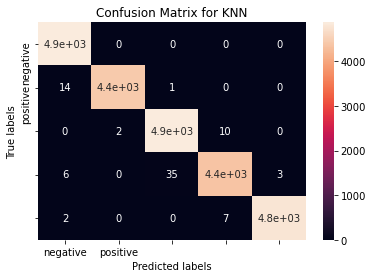

In [41]:
#confusion matrix KNN
kn= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(kn, annot=True, ax = ax); #annot=True to annotate cells
print(confusion_matrix(y_test, y_pred))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for KNN'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

# Random Forest

In [44]:
#Random Forest
forest=RandomForestClassifier(criterion='entropy',n_estimators=12,random_state=0,n_jobs=2)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
acc_forest=accuracy_score(y_test,y_pred)
a.append(acc_forest)
acc['Random Forest']=accuracy_score(y_test, y_pred) * 100

print('\nRandom Forest Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('KNN Classification report:\n\n', classification_report(y_test, y_pred))


Random Forest Accuracy: 97.71%
KNN Classification report:

               precision    recall  f1-score   support

         1.0       1.00      0.99      1.00      4867
         2.0       0.97      0.96      0.97      4461
         3.0       0.97      0.98      0.98      4887
         4.0       0.97      0.96      0.97      4417
         5.0       0.97      0.98      0.98      4797

    accuracy                           0.98     23429
   macro avg       0.98      0.98      0.98     23429
weighted avg       0.98      0.98      0.98     23429



[[4842   16    6    0    3]
 [   4 4294   23   60   80]
 [  10   10 4809   40   18]
 [   6   63   89 4235   24]
 [   1   50   17   17 4712]]


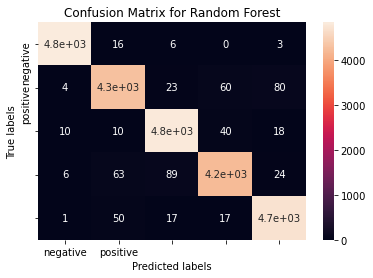

In [45]:
#confusion matrix Random Forest
fore= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(fore, annot=True, ax = ax); #annot=True to annotate cells
print(confusion_matrix(y_test, y_pred))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Random Forest'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

# Accuracy Through Graph

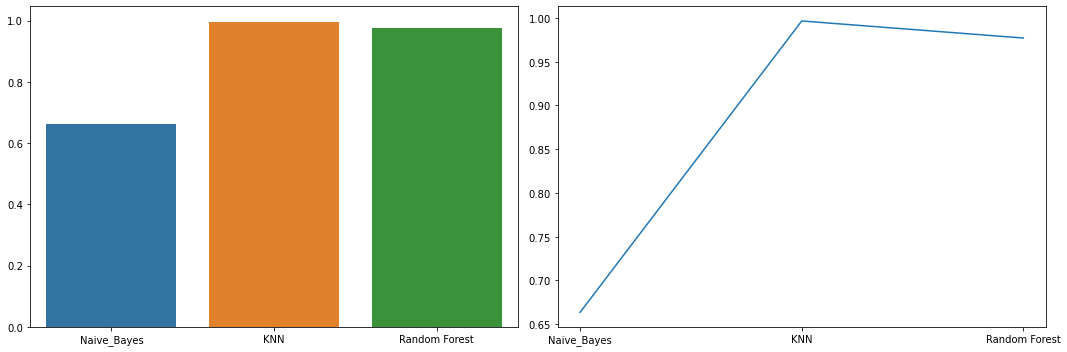

In [81]:
x_axis=[ 'Naive_Bayes','KNN','Random Forest']
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.barplot(x=x_axis,y=a,)
plt.subplot(1, 2, 2)
plt.plot(x_axis,a)
plt.tight_layout()